In [2]:
import numpy as np

## 1. Sum of a series

In [4]:
def sum_practise1(n):
    S=0
    for i in range(1,n+1):
        S+=10./(i**3)
    return S

print(sum_practise1(1000000))
%timeit(sum_practise1(1000000))

12.02056903151593
1 loop, best of 3: 536 ms per loop


In [13]:
def sum_practise1b(n):
    S=0
    i=1
    while (i<n+1):
        S+=10./(i**3)
        i+=1
    return S

print(sum_practise1b(1000000))
%timeit(sum_practise1b(1000000))

12.02056903151593
1 loop, best of 3: 590 ms per loop


In [7]:
def sum_practise1c(n):
    iarray=np.arange(1,n+1)
    return np.add.reduce(10./iarray**3)

print(sum_practise1c(1000000))
%timeit(sum_practise1c(1000000))

12.0205690316
10 loops, best of 3: 60.3 ms per loop


## 2. Matrix Product

In [14]:
def mat_prod_practise1(A,B):
    C=np.zeros((np.shape(A)[0],np.shape(B)[1]))
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(B)[1]):
            for k in range(np.shape(A)[1]):
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
    return C

def mat_prod_practise2(A,B):
    C=np.zeros((np.shape(A)[0],np.shape(B)[1]))
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(B)[1]):
            C[i,j]=np.add.reduce(A[i,:]*B[:,j])
    return C

def mat_prod_practise3(A,B):
    C=np.sum(A[:,np.newaxis,:]*B.T[np.newaxis,:,:],axis=-1)
    return C 

In [15]:
np.random.seed(0)
A=np.random.randint(9,size=(20,21))
B=np.random.randint(9,size=(21,30))
%timeit(np.dot(A,B))
%timeit(mat_prod_practise1(A,B))
%timeit(mat_prod_practise2(A,B))
%timeit(mat_prod_practise3(A,B))

The slowest run took 4.95 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.1 µs per loop
100 loops, best of 3: 11.5 ms per loop
100 loops, best of 3: 3.93 ms per loop
The slowest run took 9.29 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 56.3 µs per loop


## 3. Integral 

In [113]:
def func_x2(x):
    return x**2

def trapez(a,b,n,func):
    #func(*args, **kwargs)
    x=np.linspace(a,b,n+1)
    print(np.size(x))
    valinteg=0
    dx1=np.unique(np.round(np.diff(x),5))
    #dx2=np.float((b-a)/n)
    for ix in range(np.size(x)):
        if ((ix==0) | (ix==np.size(x)-1)):
            valinteg+=+dx1/2*func(x[ix])
        else:
            valinteg+=dx1/2*2*(func(x[ix]))
    return valinteg

def trapezb(a,b,n,func):
    x=np.linspace(a,b,n+1)
    y=func(x)
    s=0
    return np.sum(0.5*(y[:-1]+y[1:])*np.diff(x))  

In [114]:
print(trapez(2,3,10,func_x2))
print(trapezb(2,3,10,func_x2))
x=np.linspace(2,3,10)
print(np.trapz(func_x2(x),x))

11
[ 6.335]
6.335
6.3353909465


## 4. Taylor develoment of a cosine

In [17]:
def fact(n):
    if n==0:
        return 1
    else:
        return np.prod(np.arange(1,n+1))

def costaylor(x, eps):
    valcos=0
    p=0
    n=2*p
    while (x**n/fact(n) > eps) :
        valcos=valcos+(-1)**p * x**n / fact(n)
        p=p+1
        n=2*p
    return(valcos)

In [18]:
x=np.pi/4.
eps=0.001
y=costaylor(x,eps)
print(y,np.cos(x))

0.70742920671 0.707106781187


## 5. Dichotomy

In [121]:
def f(x) :
    return(x-np.exp(-x))

def find_zero_func(func,x1,x2,epsilon):
    precision=np.absolute(x2-x1)
    if (np.sign(f(x2)) != np.sign(f(x1))) :
            print( "The zero is in between {} and {}" .format(x1,x2) )
            while (precision>epsilon) :
                x3= (x1+x2)/2.
                if np.sign(f(x1)) != np.sign(f(x3)) :
                    print( "The zero is in between {} and {}" .format(x1,x3) )
                    x2=x3
                    precision=abs(x2-x1)
                else :
                    print( "The zero is in between {} and {}" .format(x2,x3) )
                    x1=x3
                    precision=abs(x2-x1)

    else :
        print( "NO zero in between {} and {}" .format(x1,x2) );

    return 0.5*(x1+x2)


In [125]:
x1=0.
x2=2.
epsilon=0.01
print(f(find_zero_func(f,x1,x2,epsilon)))


The zero is in between 0.0 and 2.0
The zero is in between 0.0 and 1.0
The zero is in between 1.0 and 0.5
The zero is in between 0.5 and 0.75
The zero is in between 0.5 and 0.625
The zero is in between 0.625 and 0.5625
The zero is in between 0.5625 and 0.59375
The zero is in between 0.5625 and 0.578125
The zero is in between 0.5625 and 0.5703125
-0.00115520201502


The zero is in between 0.0 and 2.0
The zero is in between 0.0 and 1.0
The zero is in between 1.0 and 0.5
The zero is in between 0.5 and 0.75
The zero is in between 0.5 and 0.625
The zero is in between 0.625 and 0.5625
The zero is in between 0.5625 and 0.59375
The zero is in between 0.5625 and 0.578125
The zero is in between 0.5625 and 0.5703125
The zero is in between 0.0 and 2.0
The zero is in between 0.0 and 1.0
The zero is in between 1.0 and 0.5
The zero is in between 0.5 and 0.75
The zero is in between 0.5 and 0.625
The zero is in between 0.625 and 0.5625
The zero is in between 0.5625 and 0.59375
The zero is in between 0.5625 and 0.578125
The zero is in between 0.5625 and 0.5703125


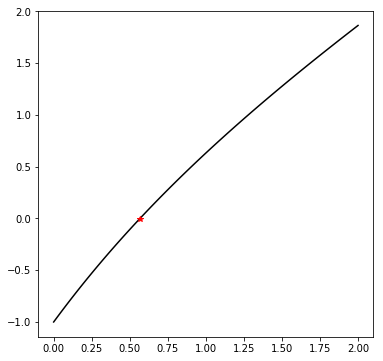

In [126]:
%matplotlib inline
from matplotlib import pylab as plt
plt.figure(figsize=(6,6))
x=np.linspace(x1,x2,100)
plt.plot(x,f(x),'k-')
plt.plot(find_zero_func(f,x1,x2,epsilon),f(find_zero_func(f,x1,x2,epsilon)),'r*')

## 6. vsort

In [89]:
def swap(A,m,n):
    tmp=A[n]
    A[n]=A[m]
    A[m]=tmp
    return A

#% Consider ONCE the full vector of n elements
def vsort(V):
    Vsort=np.copy(V)
    for n1 in range(np.size(V)-1,0,-1) :
        #print(n1)
        for n2 in range(n1):
            if (Vsort[n2]>Vsort[n2+1]) :
                Vsort=swap(Vsort,n2,n2+1)
    return Vsort


#%% Improvment
def vsort_improved(V):
    Vsort=np.copy(V)
    n1=np.size(Vsort)-1
    lswap=True
    while (lswap):
        lswap=False
        for n2 in range(n1):
            if Vsort[n2]>Vsort[n2+1] :
                Vsort=swap(Vsort,n2,n2+1)
                lswap=True
        n2=n2-1
    return Vsort
              

In [91]:
V = np.random.randint(-50,50,100);
print(V)
print(vsort(V))
print(vsort_improved(V))

[ 29 -23  35 -49 -41  31 -39  14  17  11   4 -14  34 -31  19  34  12  18
  -9  30 -34   7 -45  46 -28 -47 -42  12  42  -9  24  42  45 -39 -16  41
  -1  21 -11   8 -45  23  38 -38  47   9  28 -35 -46 -28   2  16  21  22
 -45 -11  29  29  -9  39 -28  39  39 -31  12 -21 -41 -39  49 -24  32  22
 -49  49  -4   5 -40  24 -26  45  -7  41 -37  28   5 -45 -27  -8  -1  25
   6  -7 -26  31 -29  44 -32  13  39 -21]
[-49 -49 -47 -46 -45 -45 -45 -45 -42 -41 -41 -40 -39 -39 -39 -38 -37 -35
 -34 -32 -31 -31 -29 -28 -28 -28 -27 -26 -26 -24 -23 -21 -21 -16 -14 -11
 -11  -9  -9  -9  -8  -7  -7  -4  -1  -1   2   4   5   5   6   7   8   9
  11  12  12  12  13  14  16  17  18  19  21  21  22  22  23  24  24  25
  28  28  29  29  29  30  31  31  32  34  34  35  38  39  39  39  39  41
  41  42  42  44  45  45  46  47  49  49]
[-49 -49 -47 -46 -45 -45 -45 -45 -42 -41 -41 -40 -39 -39 -39 -38 -37 -35
 -34 -32 -31 -31 -29 -28 -28 -28 -27 -26 -26 -24 -23 -21 -21 -16 -14 -11
 -11  -9  -9  -9  -8  -7  -7  -4  -1  -1